# 1. Setup

## 1.1 Install dependencies

In [1]:
!pip install tensorflow opencv-python matplotlib 

## 1.2 Import dependencies

In [2]:
# Import standard dependencies
import cv2
import os
import random
import numpy as np
from matplotlib import pyplot as plt

In [3]:
# Import tensorflow dependencies - Functional API
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Layer, Conv2D, Dense, MaxPooling2D, Input, Flatten
import tensorflow as tf

## 1.3 Set GPU growth

In [4]:
# Avoid OOM errors by setting GPU Memory Consumption Growth
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus: 
    tf.config.experimental.set_memory_growth(gpu, True)

## 1.4 Create Folder Structures

In [5]:

# Setup paths
POS_PATH = os.path.join('data', 'positive')
NEG_PATH = os.path.join('data', 'negative')
ANC_PATH = os.path.join('data', 'anchor')

# Collect Positive and Anchor images

## 2.1 Untar Labelled Faces in the Wild Dataset

In [6]:
# Move LFW Images to the following repository data/negative
for directory in os.listdir('lfw'):
    for file in os.listdir(os.path.join('lfw', directory)):
        EX_PATH = os.path.join('lfw', directory, file)
        NEW_PATH = os.path.join(NEG_PATH, file)
        os.replace(EX_PATH, NEW_PATH)

## 2.2 Collect Positive and Anchor Classes

In [7]:
# Import uuid library to generate unique image names
import uuid

In [8]:
os.path.join(ANC_PATH, '{}.jpg'.format(uuid.uuid1()))

'data/anchor/ed7105a6-32ba-11ed-b2fd-22f852edb957.jpg'

In [9]:
"""
#Collect anchor photos

# Establish a connection to the webcam
cap = cv2.VideoCapture(0)
counter=0
while cap.isOpened(): 
    ret, frame = cap.read()
    # Cut down frame to 250x250px
    frame = frame[150:150+700,750:750+700, :]
    frame = cv2.resize(frame, (250,250), interpolation = cv2.INTER_AREA)
    # Collect anchors 
    if cv2.waitKey(100):
        counter+=1
        # Create the unique file path 
        imgname = os.path.join(ANC_PATH, '{}.jpg'.format(uuid.uuid1()))
        # Write out anchor image
        cv2.imwrite(imgname, frame)
        
    
    # Breaking gracefully
    if counter>399:
        break
# Release the webcam
cap.release()
# Close the image show frame
cv2.destroyAllWindows()
"""

"\n#Collect anchor photos\n\n# Establish a connection to the webcam\ncap = cv2.VideoCapture(0)\ncounter=0\nwhile cap.isOpened(): \n    ret, frame = cap.read()\n    # Cut down frame to 250x250px\n    frame = frame[150:150+700,750:750+700, :]\n    frame = cv2.resize(frame, (250,250), interpolation = cv2.INTER_AREA)\n    # Collect anchors \n    if cv2.waitKey(100):\n        counter+=1\n        # Create the unique file path \n        imgname = os.path.join(ANC_PATH, '{}.jpg'.format(uuid.uuid1()))\n        # Write out anchor image\n        cv2.imwrite(imgname, frame)\n        \n    \n    # Breaking gracefully\n    if counter>399:\n        break\n# Release the webcam\ncap.release()\n# Close the image show frame\ncv2.destroyAllWindows()\n"

In [10]:
"""
plt.imshow(frame)
print(frame.shape)
"""

'\nplt.imshow(frame)\nprint(frame.shape)\n'

In [11]:
"""
#Collect positive photos

# Establish a connection to the webcam
cap = cv2.VideoCapture(0)
counter=0
while cap.isOpened(): 
    ret, frame = cap.read()
    # Cut down frame to 250x250px
    frame = frame[150:150+700,750:750+700, :]
    frame = cv2.resize(frame, (250,250), interpolation = cv2.INTER_AREA)
    # Collect anchors 
    if cv2.waitKey(100):
        counter+=1
        # Create the unique file path 
        imgname = os.path.join(POS_PATH, '{}.jpg'.format(uuid.uuid1()))
        # Write out anchor image
        cv2.imwrite(imgname, frame)
        
    
    # Breaking gracefully
    if counter>399:
        break
# Release the webcam
cap.release()
# Close the image show frame
cv2.destroyAllWindows()
"""

"\n#Collect positive photos\n\n# Establish a connection to the webcam\ncap = cv2.VideoCapture(0)\ncounter=0\nwhile cap.isOpened(): \n    ret, frame = cap.read()\n    # Cut down frame to 250x250px\n    frame = frame[150:150+700,750:750+700, :]\n    frame = cv2.resize(frame, (250,250), interpolation = cv2.INTER_AREA)\n    # Collect anchors \n    if cv2.waitKey(100):\n        counter+=1\n        # Create the unique file path \n        imgname = os.path.join(POS_PATH, '{}.jpg'.format(uuid.uuid1()))\n        # Write out anchor image\n        cv2.imwrite(imgname, frame)\n        \n    \n    # Breaking gracefully\n    if counter>399:\n        break\n# Release the webcam\ncap.release()\n# Close the image show frame\ncv2.destroyAllWindows()\n"

In [12]:
"""
plt.imshow(frame)
print(frame.shape)
"""

'\nplt.imshow(frame)\nprint(frame.shape)\n'

# 3. Load and preprocess images

## 3.1 Get Image Directories

In [13]:
anchor = tf.data.Dataset.list_files(ANC_PATH+'/*.jpg').take(400)
positive = tf.data.Dataset.list_files(POS_PATH+'/*.jpg').take(400)
negative = tf.data.Dataset.list_files(NEG_PATH+'/*.jpg').take(400)

2022-09-12 18:49:54.755464: I tensorflow/core/platform/cpu_feature_guard.cc:145] This TensorFlow binary is optimized with Intel(R) MKL-DNN to use the following CPU instructions in performance critical operations:  SSE4.1 SSE4.2
To enable them in non-MKL-DNN operations, rebuild TensorFlow with the appropriate compiler flags.
2022-09-12 18:49:54.756256: I tensorflow/core/common_runtime/process_util.cc:115] Creating new thread pool with default inter op setting: 10. Tune using inter_op_parallelism_threads for best performance.


In [14]:
for p in positive:
    print(p)

tf.Tensor(b'data/positive/0fb1818e-30f1-11ed-91b0-22f852edb959.jpg', shape=(), dtype=string)
tf.Tensor(b'data/positive/1573ae6c-30f1-11ed-91b0-22f852edb959.jpg', shape=(), dtype=string)
tf.Tensor(b'data/positive/021ab23e-30f1-11ed-91b0-22f852edb959.jpg', shape=(), dtype=string)
tf.Tensor(b'data/positive/02a156f4-30f1-11ed-91b0-22f852edb959.jpg', shape=(), dtype=string)
tf.Tensor(b'data/positive/1e8f3ce6-30f1-11ed-91b0-22f852edb959.jpg', shape=(), dtype=string)
tf.Tensor(b'data/positive/147e796a-30f1-11ed-91b0-22f852edb959.jpg', shape=(), dtype=string)
tf.Tensor(b'data/positive/1c2fdb2c-30f1-11ed-91b0-22f852edb959.jpg', shape=(), dtype=string)
tf.Tensor(b'data/positive/ff4ad804-30f0-11ed-91b0-22f852edb959.jpg', shape=(), dtype=string)
tf.Tensor(b'data/positive/0085591a-30f1-11ed-91b0-22f852edb959.jpg', shape=(), dtype=string)
tf.Tensor(b'data/positive/002ade18-30f1-11ed-91b0-22f852edb959.jpg', shape=(), dtype=string)
tf.Tensor(b'data/positive/0d7e63b4-30f1-11ed-91b0-22f852edb959.jpg', s

## 3.2 Preprocessing - Scale and Resize

In [15]:
def preprocess(file_path):
    
    # Read in image from file path
    byte_img = tf.io.read_file(file_path)
    # Load in the image 
    img = tf.io.decode_jpeg(byte_img)
    
    # Preprocessing steps - resizing the image to be 100x100x3
    img = tf.image.resize(img, (100,100))
    # Scale image to be between 0 and 1 
    img = img / 255.0
    
    # Return image
    return img

In [16]:
sample_img=preprocess(b'data/positive/03f42f40-30f1-11ed-91b0-22f852edb959.jpg')

In [17]:
sample_img.numpy().max()

0.95

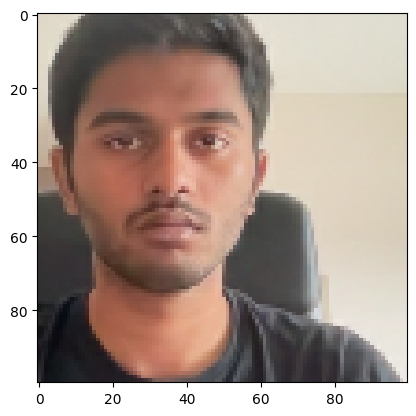

In [18]:
plt.imshow(sample_img)

## 3.3 Create Labelled Dataset

In [19]:
# (anchor, positive) => 1,1,1,1,1
# (anchor, negative) => 0,0,0,0,0

positives = tf.data.Dataset.zip((anchor, positive, tf.data.Dataset.from_tensor_slices(tf.ones(400))))
negatives = tf.data.Dataset.zip((anchor, negative, tf.data.Dataset.from_tensor_slices(tf.zeros(400))))
data = positives.concatenate(negatives)

In [20]:
example = None

for d in data:
    if example==None:
        example=d
    else:
        break

## 3.4 Build Train and Test Partition

In [21]:
def preprocess_twin(input_img, validation_img, label):
    return(preprocess(input_img), preprocess(validation_img), label)

In [22]:
result = preprocess_twin(*example)

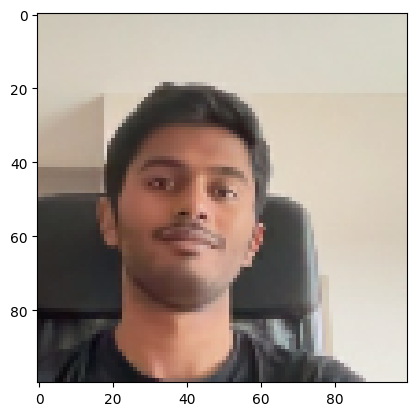

In [23]:
plt.imshow(result[1])

In [24]:
# Build dataloader pipeline
data = data.map(preprocess_twin)
data = data.cache()
data = data.shuffle(buffer_size=1024)

In [25]:
c=0
for d in data:
    c+=1

print(c)

800


In [26]:
# Training partition
train_data = data.take(round(800*.7))
train_data = train_data.batch(16)
train_data = train_data.prefetch(8)

In [27]:
counter=0
for t in train_data:
    counter+=1
print(counter)

35


In [28]:
# Testing partition
test_data = data.skip(round(800*.7))
test_data = test_data.take(round(800*.3))
test_data = test_data.batch(16)
test_data = test_data.prefetch(8)

counter=0
for t in test_data:
    counter+=1
print(counter)

15


# 4. Model Engineering

## 4.1 Build Embedding Layer

In [29]:
inp = Input(shape=(100,100,3), name='input_image')

In [30]:
c1 = Conv2D(64, (10,10), activation='relu')(inp)

In [31]:
m1 = MaxPooling2D(64, (2,2), padding='same')(c1)

In [32]:
c2 = Conv2D(128, (7,7), activation='relu')(m1)
m2 = MaxPooling2D(64, (2,2), padding='same')(c2)

In [33]:
c3 = Conv2D(128, (4,4), activation='relu')(m2)
m3 = MaxPooling2D(64, (2,2), padding='same')(c3)

In [34]:
c4 = Conv2D(256, (4,4), activation='relu')(m3)
f1 = Flatten()(c4)
d1 = Dense(4096, activation='sigmoid')(f1)

In [35]:
mod = Model(inputs=[inp], outputs=[d1], name='embedding')

In [36]:
mod.summary()

Model: "embedding"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_image (InputLayer)     [(None, 100, 100, 3)]     0         
_________________________________________________________________
conv2d (Conv2D)              (None, 91, 91, 64)        19264     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 46, 46, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 40, 40, 128)       401536    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 20, 20, 128)       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 17, 17, 128)       262272    
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 9, 9, 128)         0 

In [37]:
#summarise in one function

def make_embedding(): 
    inp = Input(shape=(100,100,3), name='input_image')
    
    # First block
    c1 = Conv2D(64, (10,10), activation='relu')(inp)
    m1 = MaxPooling2D(64, (2,2), padding='same')(c1)
    
    # Second block
    c2 = Conv2D(128, (7,7), activation='relu')(m1)
    m2 = MaxPooling2D(64, (2,2), padding='same')(c2)
    
    # Third block 
    c3 = Conv2D(128, (4,4), activation='relu')(m2)
    m3 = MaxPooling2D(64, (2,2), padding='same')(c3)
    
    # Final embedding block
    c4 = Conv2D(256, (4,4), activation='relu')(m3)
    f1 = Flatten()(c4)
    d1 = Dense(4096, activation='sigmoid')(f1)
    
    
    return Model(inputs=[inp], outputs=[d1], name='embedding')

In [38]:
embedding = make_embedding()

In [39]:
embedding.summary()

Model: "embedding"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_image (InputLayer)     [(None, 100, 100, 3)]     0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 91, 91, 64)        19264     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 46, 46, 64)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 40, 40, 128)       401536    
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 20, 20, 128)       0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 17, 17, 128)       262272    
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 9, 9, 128)         0 

## 4.2 Build Distance Layer

In [40]:
# Siamese L1 Distance class
class L1Dist(Layer):
    
    # Init method - inheritance
    def __init__(self, **kwargs):
        super().__init__()
       
    # Magic happens here - similarity calculation
    def call(self, input_embedding, validation_embedding):
        return tf.math.abs(input_embedding - validation_embedding)

In [41]:
l1 = L1Dist()

## 4.3 Make Siamese Model

In [42]:
input_image = Input(name='input_img', shape=(100,100,3))
validation_image = Input(name='validation_img', shape=(100,100,3))

In [43]:
inp_embedding = embedding(input_image)
val_embedding = embedding(validation_image)

In [44]:
siamese_layer = L1Dist()

In [45]:
distances = siamese_layer(inp_embedding, val_embedding)

In [46]:
classifier = Dense(1, activation='sigmoid')(distances)

In [47]:
classifier

<tf.Tensor 'dense_2/Identity:0' shape=(None, 1) dtype=float32>

In [48]:
siamese_network = Model(inputs=[input_image, validation_image], outputs=classifier, name='SiameseNetwork')

In [49]:
siamese_network.summary()

Model: "SiameseNetwork"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_img (InputLayer)          [(None, 100, 100, 3) 0                                            
__________________________________________________________________________________________________
validation_img (InputLayer)     [(None, 100, 100, 3) 0                                            
__________________________________________________________________________________________________
embedding (Model)               (None, 4096)         38960448    input_img[0][0]                  
                                                                 validation_img[0][0]             
__________________________________________________________________________________________________
l1_dist_1 (L1Dist)              (None, 4096)         0           embedding[1][0]     

In [50]:
def make_siamese_model(): 
    
    # Anchor image input in the network
    input_image = Input(name='input_img', shape=(100,100,3))
    
    # Validation image in the network 
    validation_image = Input(name='validation_img', shape=(100,100,3))
    
    # Combine siamese distance components
    siamese_layer = L1Dist()
    siamese_layer._name = 'distance'
    distances = siamese_layer(embedding(input_image), embedding(validation_image))
    
    # Classification layer 
    classifier = Dense(1, activation='sigmoid')(distances)
    
    return Model(inputs=[input_image, validation_image], outputs=classifier, name='SiameseNetwork')

In [51]:
siamese_model = make_siamese_model()

In [52]:
siamese_model.summary()

Model: "SiameseNetwork"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_img (InputLayer)          [(None, 100, 100, 3) 0                                            
__________________________________________________________________________________________________
validation_img (InputLayer)     [(None, 100, 100, 3) 0                                            
__________________________________________________________________________________________________
embedding (Model)               (None, 4096)         38960448    input_img[0][0]                  
                                                                 validation_img[0][0]             
__________________________________________________________________________________________________
distance (L1Dist)               (None, 4096)         0           embedding[3][0]     

# 5. Training

## 5.1 Setup Loss and Optimizer

In [53]:
binary_cross_loss = tf.losses.BinaryCrossentropy()

In [54]:
opt = tf.keras.optimizers.Adam(1e-4) # 0.0001

## 5.2 Establish Checkpoints

In [55]:

checkpoint_dir = './training_checkpoints'
checkpoint_prefix = os.path.join(checkpoint_dir, 'ckpt')
checkpoint = tf.train.Checkpoint(opt=opt, siamese_model=siamese_model)

## 5.3 Build Train Step Function

In [56]:
@tf.function
def train_step(batch):
    
    # Record all of our operations 
    with tf.GradientTape() as tape:     
        # Get anchor and positive/negative image
        X = batch[:2]
        # Get label
        y = batch[2]
        
        # Forward pass
        yhat = siamese_model(X, training=True)
        # Calculate loss
        loss = binary_cross_loss(y, yhat)
    print(loss)
        
    # Calculate gradients
    grad = tape.gradient(loss, siamese_model.trainable_variables)
    
    # Calculate updated weights and apply to siamese model
    opt.apply_gradients(zip(grad, siamese_model.trainable_variables))
    
    # Return loss
    return loss

## 5.4 Build Training Loop

In [57]:
def train(data, EPOCHS, length):
    # Loop through epochs
    for epoch in range(1, EPOCHS+1):
        print('\n Epoch {}/{}'.format(epoch, EPOCHS))
        progbar = tf.keras.utils.Progbar(length)
        
        # Loop through each batch
        for idx, batch in enumerate(data):
            # Run train step here
            train_step(batch)
            progbar.update(idx+1)
        
        # Save checkpoints
        if epoch % 10 == 0: 
            checkpoint.save(file_prefix=checkpoint_prefix)

## 5.5 Train the model

In [58]:
EPOCHS = 50
length=35

In [59]:
train(train_data, EPOCHS, length)


 Epoch 1/50
Tensor("binary_crossentropy/weighted_loss/value:0", shape=(), dtype=float32)
Tensor("binary_crossentropy/weighted_loss/value:0", shape=(), dtype=float32)
35/35 [==============================] - 878s 25s/step

 Epoch 2/50
35/35 [==============================] - 873s 25s/step

 Epoch 3/50
35/35 [==============================] - 1072s 31s/step

 Epoch 4/50
35/35 [==============================] - 1738s 50s/step

 Epoch 5/50
35/35 [==============================] - 935s 27s/step

 Epoch 6/50
35/35 [==============================] - 951s 27s/step

 Epoch 7/50
35/35 [==============================] - 963s 28s/step

 Epoch 8/50
35/35 [==============================] - 2084s 60s/step

 Epoch 9/50
35/35 [==============================] - 894s 26s/step

 Epoch 10/50
35/35 [==============================] - 880s 25s/step

 Epoch 11/50
35/35 [==============================] - 882s 25s/step

 Epoch 12/50
35/35 [==============================] - 2035s 58s/step

 Epoch 13/50
35/35 [==

# 6. Evaluate Model

In [60]:
# Import metric calculations
from tensorflow.keras.metrics import Precision, Recall

In [61]:
ex=None
for t in test_data:
    if ex==None:    
        ex=t
    else:
        break

In [62]:
# Get a batch of test data
test_input, test_val, y_true = ex

In [63]:
# Make predictions
y_hat = siamese_model.predict([test_input, test_val])
y_hat

array([[3.5879016e-04],
       [8.3446503e-07],
       [1.0000000e+00],
       [8.9406967e-08],
       [1.0000000e+00],
       [1.0000000e+00],
       [0.0000000e+00],
       [1.0000000e+00],
       [1.0000000e+00],
       [0.0000000e+00],
       [1.0000000e+00],
       [9.9999988e-01],
       [0.0000000e+00],
       [9.9999964e-01],
       [1.0000000e+00],
       [5.0663948e-07]], dtype=float32)

In [64]:
# Post processing the results 
[1 if prediction > 0.5 else 0 for prediction in y_hat ]

[0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0]

In [65]:
y_true

<tf.Tensor: id=12199, shape=(16,), dtype=float32, numpy=
array([0., 0., 1., 0., 1., 1., 0., 1., 1., 0., 1., 1., 0., 1., 1., 0.],
      dtype=float32)>

# 7. Save Model

In [70]:
!mkdir -p saved_model
siamese_model.save('saved_model/siamesemodel')

2022-09-13 10:21:39.620712: W tensorflow/python/util/util.cc:299] Sets are not currently considered sequences, but this may change in the future, so consider avoiding using them.


Instructions for updating:
If using Keras pass *_constraint arguments to layers.
INFO:tensorflow:Assets written to: saved_model/siamesemodel/assets


In [71]:
# Reload model 
model = tf.keras.models.load_model('saved_model/siamesemodel', 
                                   custom_objects={'L1Dist':L1Dist, 'BinaryCrossentropy':tf.losses.BinaryCrossentropy})

In [72]:
# Make predictions with reloaded model
model.predict([test_input, test_val])

array([[3.5879016e-04],
       [8.3446503e-07],
       [1.0000000e+00],
       [8.9406967e-08],
       [1.0000000e+00],
       [1.0000000e+00],
       [0.0000000e+00],
       [1.0000000e+00],
       [1.0000000e+00],
       [0.0000000e+00],
       [1.0000000e+00],
       [9.9999988e-01],
       [0.0000000e+00],
       [9.9999964e-01],
       [1.0000000e+00],
       [5.0663948e-07]], dtype=float32)

# 8. Real Time Test